In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
cd /content/drive/My Drive/custom

/content/drive/My Drive/custom


In [107]:
ls

example_naruto.jpg  images/         X.pickle
example_sasuke.jpg  sasuke_exa.jpg  y.pickle


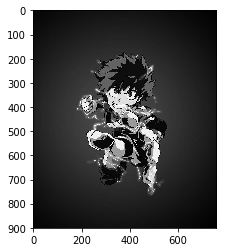

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

datadir = 'images/'
categories = ['sasuke' , 'naruto']

for cate in categories:
  path = os.path.join(datadir , cate)
  for img in os.listdir(path):
    img_array =  cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array , cmap = "gray")
    plt.show()
    break
  break
  

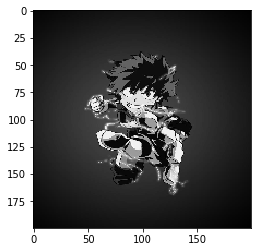

In [109]:
IMG_SIZE = 200
new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [0]:
training_data = []

def creating_training_data():
  for cate in categories:
    try:
      path = os.path.join(datadir , cate)
      class_num = categories.index(cate)
      for img in os.listdir(path):
        img_array =  cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array , (IMG_SIZE,IMG_SIZE)).astype('uint8')
        training_data.append([new_array , class_num])
    except Exception as e:
      pass
creating_training_data()
    
  

In [111]:
print(len(training_data))

182


In [0]:
import random 
random.shuffle(training_data)


In [0]:
X = []
y = []
for features , label in training_data:
  X.append(features)
  y.append(label)
  
X = np.array(X).reshape(-1,IMG_SIZE , IMG_SIZE , 3)

In [90]:
X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [0]:


import pickle

pickle_out = open('X.pickle' , 'wb')
pickle.dump(X , pickle_out)
pickle_out.close()

pickle_out = open('y.pickle' , 'wb')
pickle.dump(y , pickle_out)
pickle_out.close()

In [0]:
pickle_in = open('X.pickle' , "rb")
X = pickle.load(pickle_in)

In [93]:
X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [0]:
from tqdm import tqdm, tqdm_notebook
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
import pickle

In [0]:
pickle_in = open('X.pickle' , "rb")
X = pickle.load(pickle_in)

In [0]:
y = pickle.load(open('y.pickle' , 'rb'))

In [0]:
X = X/255.0

In [0]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(200, 200, 3))

In [121]:
vgg16_net.trainable = True
model = Sequential()     #Starting Point
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

model.fit(X,y,batch_size = 32 ,epochs = 30, validation_split = 0.1)


Train on 163 samples, validate on 19 samples
Epoch 1/30
163/163 [==============================] - 10s 61ms/step - loss: 0.8056 - acc: 0.4969 - val_loss: 0.7130 - val_acc: 0.4737
Epoch 2/30
163/163 [==============================] - 4s 26ms/step - loss: 0.6191 - acc: 0.6626 - val_loss: 0.6862 - val_acc: 0.6316
Epoch 3/30
163/163 [==============================] - 4s 26ms/step - loss: 0.5305 - acc: 0.7485 - val_loss: 0.6596 - val_acc: 0.6316
Epoch 4/30
163/163 [==============================] - 4s 26ms/step - loss: 0.4473 - acc: 0.8098 - val_loss: 0.6395 - val_acc: 0.6316
Epoch 5/30
163/163 [==============================] - 4s 26ms/step - loss: 0.3735 - acc: 0.8896 - val_loss: 0.6195 - val_acc: 0.5789
Epoch 6/30
163/163 [==============================] - 4s 26ms/step - loss: 0.2701 - acc: 0.9325 - val_loss: 0.5817 - val_acc: 0.5789
Epoch 7/30
163/163 [==============================] - 4s 26ms/step - loss: 0.2028 - acc: 0.9387 - val_loss: 0.5259 - val_acc: 0.7895
Epoch 8/30
163/163 [===

In [0]:
img_array =  cv2.imread('midoriya_ex.jpg')
    

In [0]:
new_img = cv2.resize(img_array , (IMG_SIZE,IMG_SIZE)).astype('uint8')
      

In [0]:
new_img = np.array(new_img).reshape(-1,IMG_SIZE , IMG_SIZE , 3)

In [0]:
new_img = new_img/255.0

In [131]:
model.predict(new_img)

array([[0.00110926]], dtype=float32)